# 1.1.0 Decennial Census of Population and Housing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Analyzing US Census Data in Python'
data = make_dir_line(modality, project)

raw = data('raw')

## 1.1.2 Aggregate and Calculate Proportions

In [4]:
states = pd.read_csv(raw / "states.csv", sep=',', index_col=0)
print(states.info())
states.head()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   total                 52 non-null     int64
 1   nonhispanic           52 non-null     int64
 2   white                 52 non-null     int64
 3   black                 52 non-null     int64
 4   aian                  52 non-null     int64
 5   asian                 52 non-null     int64
 6   pacific               52 non-null     int64
 7   other                 52 non-null     int64
 8   multiracial           52 non-null     int64
 9   hispanic              52 non-null     int64
 10  hispanic_white        52 non-null     int64
 11  hispanic_black        52 non-null     int64
 12  hispanic_aian         52 non-null     int64
 13  hispanic_asian        52 non-null     int64
 14  hispanic_pacific      52 non-null     int64
 15  hispanic_other        52 non-null     int64
 16  hisp

,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


In [5]:
# What percentage of Hispanics identify as White?
print(100 * states['hispanic_white'].sum() / states['hispanic'].sum())

54.5246839030109


In [6]:
# Set list of Hispanic race column names
hispanic_races = [
    "hispanic_white", 
    "hispanic_black", "hispanic_aian", 
    "hispanic_asian", "hispanic_pacific", 
    "hispanic_other", "hispanic_multiracial"
    ]

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64


Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race". Now we will calculate similar percentages for individual states.

## 0.1.3 Calculate Proportions

In [7]:
# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states_hr[race] / states["hispanic"]

# View the result
print(states_hr.head())

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64
            hispanic_white  hispanic_black  hispanic_aian  hispanic_asian  \
Alabama          38.249588        3.703624       1.245137        0.354522   
Alaska           46.513287        3.347856       5.898239        1.722337   
Arizona          51.261088        1.050419       2.063321        0.326412   
Arkansas         38.570277        1.501209       1.109917        0.244558   
California       46.366571        0.965254       1.431105        0.613235   

            hispanic_pacific  hispanic_other  hispanic_multiracial  
Alabama             0.582429       50.042564              5.822136  
Alaska              0.484089       25.455426             16.578766  
Arizona             0.089122       39.739408              5.470230  
Arkansas

## 0.1.4 Identify Extreme Values

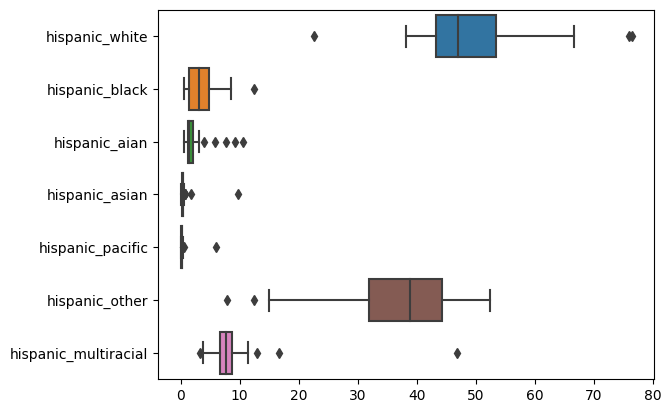

In [8]:
# Create a boxplot
sns.boxplot(data = states_hr, orient = "h")
plt.show()

In [9]:
print(states_hr.nlargest(1, states_hr).squeeze())

hispanic_white          76.339680
hispanic_black           3.521989
hispanic_aian            0.572777
hispanic_asian           0.227402
hispanic_pacific         0.060633
hispanic_other          14.978955
hispanic_multiracial     4.298564
Name: Florida, dtype: float64


In [10]:
print(states_hr.nlargest(1, "hispanic_white").squeeze())

hispanic_white          76.339680
hispanic_black           3.521989
hispanic_aian            0.572777
hispanic_asian           0.227402
hispanic_pacific         0.060633
hispanic_other          14.978955
hispanic_multiracial     4.298564
Name: Florida, dtype: float64


In [11]:
print(states_hr.nsmallest(1, "hispanic_other").squeeze())

hispanic_white          75.862495
hispanic_black          12.385538
hispanic_aian            0.528948
hispanic_asian           0.105762
hispanic_pacific         0.007944
hispanic_other           7.831978
hispanic_multiracial     3.277334
Name: Puerto Rico, dtype: float64


In [12]:
print(states_hr.nlargest(1, "hispanic_asian").squeeze())

hispanic_white          22.555072
hispanic_black           1.257841
hispanic_aian            1.109714
hispanic_asian           9.751576
hispanic_pacific         5.958193
hispanic_other          12.493173
hispanic_multiracial    46.874431
Name: Hawaii, dtype: float64


## 0.1.6 The Basic API Request

In [13]:
# Build base URL
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ['NAME','P013001','P037001']
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

In [14]:
# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

## 0.1.7 The API Response and Pandas

In [15]:
# Construct the DataFrame
col_names = ['name', 'median_age','avg_family_size','state']
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

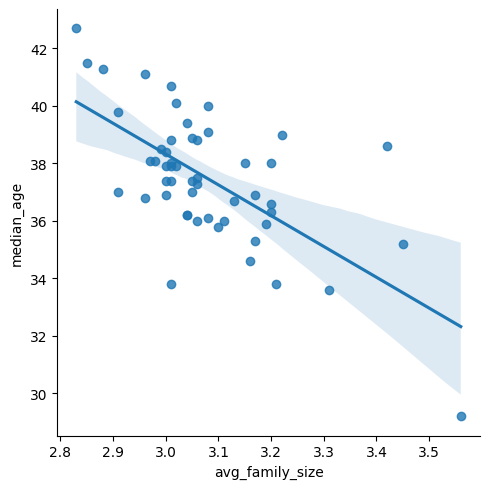

In [16]:
# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

In [17]:
states.head()

,name,median_age,avg_family_size,state
0,Alabama,37.9,3.02,01
1,Alaska,33.8,3.21,02
2,Arizona,35.9,3.19,04
3,Arkansas,37.4,3.00,05
4,California,35.2,3.45,06


## 0.1.8 API to Visualization: Group Quarters

In [18]:
# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

In [19]:
# Construct DataFrame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)
# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states["in_adult"] / (states["in_adult"] + states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
states.head()

,name,in_adult,in_juvenile,state,pct_in_adult
40,South Carolina,451,265,45,62.988827
33,North Carolina,655,552,37,54.266777
2,Arizona,681,629,04,51.984733
10,District of Columbia,28,27,11,50.909091
1,Alaska,83,92,02,47.428571


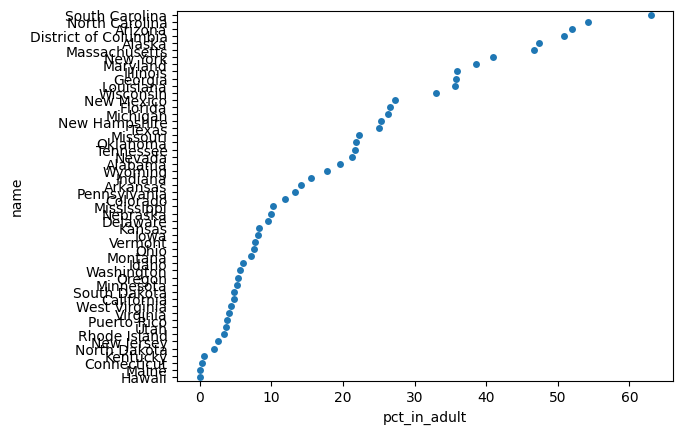

In [20]:
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

Notice that Southern states top the chart, w(hile some states are at or near 0%.

## 0.1.10 Specific Places

https://mcdc.missouri.edu/applications/geocodes/?state=00

- five digit place (cities) codes: Philadelphia and Pittsburgh cities -> 60000,61000
- two digit state code: Pennsylvania -> 42

In [21]:
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000"
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


## 0.1.11 Congressional Districts by State

In [22]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

In [23]:
# Print the head of the "avg_family_size" column
cd['avg_family_size'].head()

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object

In [24]:
# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
print(cd)

                                                 name  avg_family_size state  \
0   Congressional District 1 (111th Congress), Pen...         655146.0    42   
1   Congressional District 2 (111th Congress), Pen...         630277.0    42   
2   Congressional District 3 (111th Congress), Pen...         640356.0    42   
3   Congressional District 4 (111th Congress), Pen...         647418.0    42   
4   Congressional District 5 (111th Congress), Pen...         651762.0    42   
5   Congressional District 8 (111th Congress), Pen...         672685.0    42   
6   Congressional District 6 (111th Congress), Pen...         726465.0    42   
7   Congressional District 7 (111th Congress), Pen...         673623.0    42   
8   Congressional District 11 (111th Congress), Pe...         687860.0    42   
9   Congressional District 9 (111th Congress), Pen...         666810.0    42   
10  Congressional District 10 (111th Congress), Pe...         669257.0    42   
11  Congressional District 12 (111th Con

## 0.1.12 Zip Code Tabulation Areas

In [25]:
# Build dictionary of predicates and execute the request
predicates = {}
predicates["get"] = ",".join(["NAME",  "P001001"])
predicates["for"] = "zip code tabulation area (or part):*"
predicates["in"] = "state:01"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "total_pop", "state", "zcta"]
zctas = pd.DataFrame(columns=col_names, data=r.json()[1:])
zctas["total_pop"] = zctas["total_pop"].astype(int)

# Set multilevel index from GEOIDs and print the head
zctas.set_index(["state", "zcta"], inplace = True)
print(zctas.head())

                                    name  total_pop
state zcta                                         
01    30165  ZCTA5 30165 (part), Alabama         70
      31905  ZCTA5 31905 (part), Alabama          9
      35004         ZCTA5 35004, Alabama      10427
      35005         ZCTA5 35005, Alabama       7942
      35006         ZCTA5 35006, Alabama       3121


In [26]:
print('ok_')

ok_
